In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Houses Prices - Exploratory Data Analysis

## Introduction

Dans ces travaux pratiques, nous allons nous intéresser à la compréhension d'un des datasets qui nous servira de terrain de jeu à certains points de la formation.

Ce dataset contient tous types de variables, a des valeurs manquantes, un nombre important de features et celles-ci ne sont pas forcément adaptées aux méthodes qu'on essaye de leur appliquer : il modélise bien un dataset que vous rencontrerez au jour le jour en faisant de la data science.

Nous allons appliquer le workflow vu en cours, en nous arrêtant toutefois à la création du modèle, que nous verrons demain.

Rappel du workflow :

1. définir la question à laquelle on veut répondre
2. obtenir les données
3. nettoyer les données
4. explorer les données
5. entraîner des modèles
6. évaluer et communiquer les résultats
7. rendre l'analyse reproductible

## Définition du problème

La problématique d'intérêt dans cette analyse est la prédiction de prix de maisons en Iowa, aux États-Unis.

Pour que le problème soit bien posé, il faut établir dès le début de l'analyse quelles sont les sorties attendues et les mesures d'évaluation de ces sorties.

- définissez formellement la sortie du modèle
- proposez une ou plusieurs métriques pour évaluer la qualité de ce que le modèle prédira
- quel est le problème qui se pose si on ne définit pas ces deux éléments en amont ?

Réponse :

- la sortie du modèle est le prix de la maison
- différence entre la prédiction et la réalité, potentiellement au carré
- on introduit un biais statistique : on pourrait choisir les métriques a posteri qui maximisent nos résultats

## Acquisition des données

Cette étude est clairement observationnelle : nous n'avons pas mis en place un protocole de récolte des données et n'avons pas non plus mis en place de groupes témoins, éléments nécessaires à une analyse expérimentale correcte.

- quels sont les risques que cela entraine ?
- comment peut-on mesurer si l'analyse qui suit est correcte ?

Réponse :

- risques de biais statistiques multiples
- en utilisant des mesures extrinsèques et en étant rigoureux sur la validation de nos hypothèses avec un test set adapté

Les données se trouvent dans le répertoire `../data/ames`. Celui-ci contient en particulier un fichier `train.csv` que vous pouvez utiliser comme ensemble d'entraînement et de validation et un fichier `test.csv` que vous pouvez utiliser comme ensemble de test.

- dans la case suivante, chargez les csv dans des DataFrame que vous attribuerez aux variables `train_df` et `test_df`

- affichez le nom des colonnes des dataframes ainsi que leurs formes

In [2]:
train_df = pd.read_csv('../data/ames/train.csv')
test_df = pd.read_csv('../data/ames/test.csv')

print('Colonnes :', ', '.join(train_df.columns))
print('Forme de la DataFrame de train :', train_df.shape)
print('Forme de la DataFrame de test :', test_df.shape)

Colonnes : Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice
Forme de la DataFrame de train : (1460, 81)
Forme de l

- créez les variables `train_X`, `train_y` et `test_X` qui contiennent les variables d'entrée et de sortie des datasets correspondants (ne considérez pas la variable `Id` comme une variable d'entrée)

__Attention, utiliser `test_X` peut induire un biais statistique !__

In [3]:
train_X, train_y = train_df.iloc[:, 1:-1], train_df.iloc[:, -1]
test_X = test_df.iloc[:, 1:]

print("Forme des données d'entrainement :", train_X.shape, train_y.shape)
print("Forme des données de test :", test_X.shape)

Forme des données d'entrainement : (1460, 79) (1460,)
Forme des données de test : (1459, 79)


## Nettoyage des données

Cette étape, jointe avec l'exploration, passe par (au moins) 4 étapes :

- gérer les valeurs manquantes
- préprocessing (texte, image, …)
- standardisation
- transformation

Ici, nous n'aurons pas besoin de préprocessing spécifique, car les données sont principalement catégorielles ou continues, sans données textuelles ou d'images.

### Valeurs manquantes

Les différences de format, les conditions de récolte des données ainsi que beaucoup d'autres facteurs entraînent de nombreuses valeurs manquantes dans la plupart des datasets.

Il est souvent intéressant de quantifier ce manque et de le pallier si cela est judicieux. Il est par exemple intéressant de noter que pour utiliser `sklearn`, il faut qu'aucune valeur ne manque pour que la quasi totalité des modèles fonctionne.

- avec la fonction `DataFrame.isnull`, trouvez le nombre d'éléments manquants dans le training set

In [4]:
train_X.isnull().sum().sum()

6965

- adaptez ce procédé pour calculer le pourcentage d'éléments manquants par colonne
- triez ce résultat pour afficher en premier les colonnes auxquelles il manque le plus d'éléments

In [5]:
train_X_na = (train_X.isnull().sum() / len(train_X)) * 100
train_X_na = train_X_na.drop(train_X_na[train_X_na == 0].index)
train_X_na.sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

En fonction de la documentation présente dans le fichier `../data/ames/data_description.txt`, utilisez les groupes `cols_1` à `cols_5` pour appliquer 5 types de gestion des valeurs manquantes différents. Toutes ces gestions impliquent d'utiliser la fonction `DataFrame.fillna` qui permet de remplir les valeurs manquantes avec les arguments qu'on lui passe.

In [6]:
# Fill with median
cols_1 = ['LotFrontage']
train_X[cols_1] = train_X[cols_1].fillna(
    train_X[cols_1].median())

# Fill with mode
cols_2 = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st',
             'Exterior2nd', 'SaleType', 'Utilities']
train_X[cols_2] = train_X[cols_2].fillna(
    train_X[cols_2].mode().iloc[0, :])

#Fill with 'None'
cols_3 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
             'GarageQual', 'GarageCond', 'GarageFinish', 'GarageType',
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
             'BsmtFinType2', 'MasVnrType', 'MSSubClass']
train_X[cols_3] = train_X[cols_3].fillna('None')

# Fill with 0
cols_4 = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1',
             'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath',
             'BsmtHalfBath', 'MasVnrArea']
train_X[cols_4] = train_X[cols_4].fillna(0)

# Other fills
cols_5 = ['Functional']
train_X[cols_5] = train_X[cols_5].fillna("Typ")

train_X.isnull().sum().sum()

0

### Variables ordinales

Pour ne pas perdre l'information d'ordre des variables ordinales, il est important d'utiliser le label encoding vu en cours.

- label encodez les variables `BsmtCond` et `FireplaceQu`. Il faudra sûrement utiliser la fonction `DataFrame.replace`

In [7]:
# Some columns are ordinals, not numerical
cols_numerical2ordinal = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']
train_X[cols_numerical2ordinal] = train_X[cols_numerical2ordinal].astype(str)

train_X = train_X.replace({
    "Alley" : {"Grvl" : 1, "Pave" : 2},
    "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
    "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
    "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
    "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
    "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
    "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
    "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8},
    "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
    "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
    "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
    "PavedDrive" : {"None" : 0, "P" : 1, "Y" : 2},
    "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
    "Street" : {"Grvl" : 1, "Pave" : 2},
    "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}
})

### One hot encoding des variables catégorielles

Maintenant que les variables ordinales sont traitées, il faut encore traiter les variables catégorielles.

- appliquez la transformation de one-hot encoding avec la fonction `pandas.get_dummies`
- comment a évolué la forme de `train_X` ?

In [8]:
print(train_X.shape)
train_X = pd.get_dummies(train_X)
print(train_X.shape)

(1460, 79)
(1460, 274)


Chaque catégorie de chaque variable catégorielle a été transformée en feature. La matrice d'entrée est passée de sa taille originale de $\mathbb{R}^{1460\times 79}$ à $\mathbb{R}^{1460\times 274}$.

## Exploration des données
### Analyse de la variable de sortie

Les principales étapes de nettoyage des données étant finies, on peut commencer à analyser le dataset. Cette [page du manuel de seaborn](https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions) explique les principales techniques nécessaires. 

- utilisez `seaborn` pour visualiser la variable de sortie.

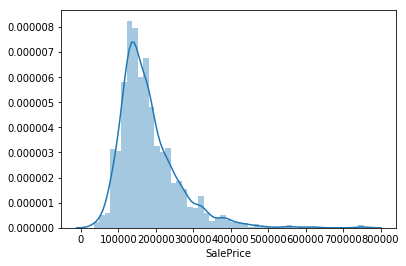

In [9]:
sns.distplot(train_y)
plt.show()

### Comparer la variable de sortie à une distribution normale

Un prérequis de beaucoup d'approches est la normalité de la variable de sortie.

- testez cette hypothèse.

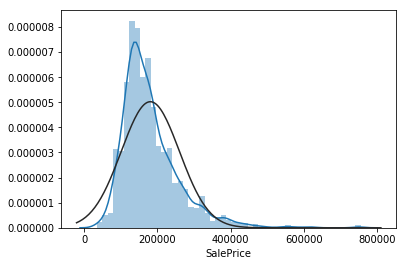

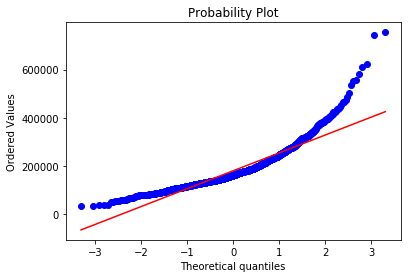

In [10]:
sns.distplot(train_y, fit=scipy.stats.norm)
plt.show()

fig = plt.figure()
scipy.stats.probplot(train_y, dist='norm', plot=plt)
plt.show()

### Analyse des corrélations à la variable de sortie

Maintenant que nous avons une bonne idée de la forme de la variable de sortie, analysons les variables qui lui sont le plus corrélées.

- utilisez `DataFrame.corr` et `sns.heatmap` pour afficher une matrice de corrélation. Optionnellement, triez la en fonction des corrélations avec la variable de sortie

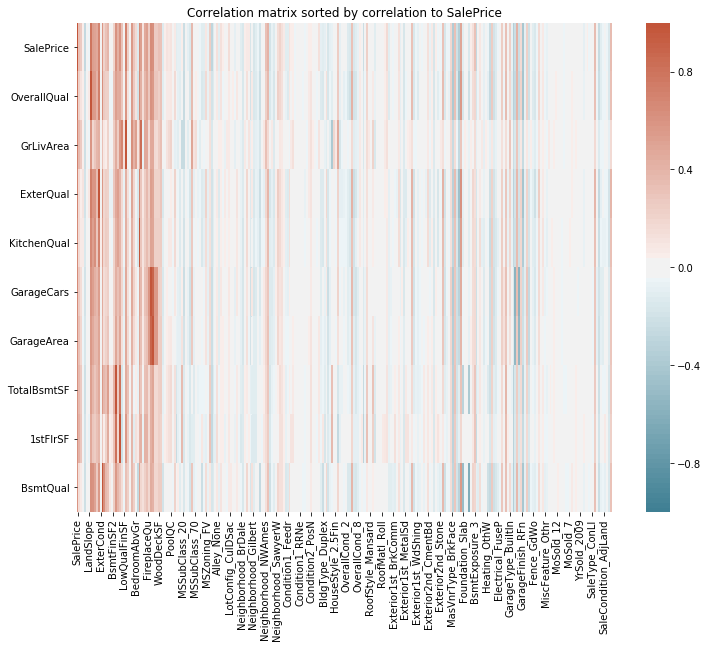

In [11]:
corrmat = (pd.concat([train_y, train_X], axis=1)
           .corr()
           .sort_values(by='SalePrice', ascending=False))

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat.iloc[:10, :],
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 20, n=100))
plt.title('Correlation matrix sorted by correlation to SalePrice')
plt.show()

### Analyse des variables les plus corrélées

Les variables les plus corrélées sont maintenant connues. Il reste à nous renseigner sur ces dernières.

- Graphez la distribution jointe de `GrLivArea` et `SalePrice` ainsi que `OverallQual` et `SalePrice`

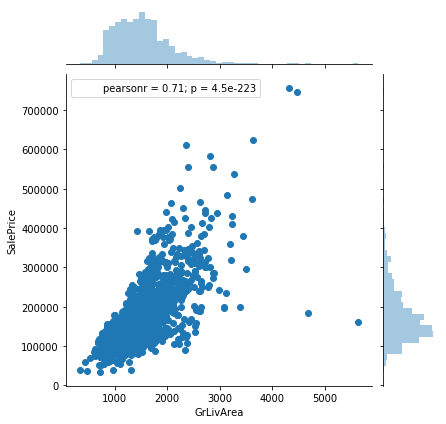

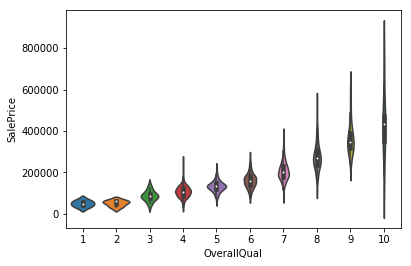

In [12]:
sns.jointplot(x=train_X['GrLivArea'], y=train_y)
plt.show()
sns.violinplot(x=train_X['OverallQual'], y=train_y)
plt.show()

- que remarquez-vous sur ces deux plots ?


Il semble qu'il y ait deux valeurs clairement outlier : les valeurs aux plus grandes `GrLivArea`.